In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

C:\Users\Thaomy\AppData\Local\Temp\ipykernel_15552\1858675051.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Questions and Answers
1.  see Plot PCA
2.  see Choosing Number of Clusters
3.  I chose 2 clusters as the right number of clusters because 2 was the "elbow" of the elbow plot. Sum of squared distances dropped off dramatically from 1 to 2 and from 2 onwards, the change of SSD wasn't too big or significant.
4.  see Plotting PCA + KMeans Cluster Centers
5.  Yes, this clustering does make sense visually as one cluster is the skinny long cluster to the left and the other cluster is probably the more broad cluster to the right. eyes?

## Load Data

In [2]:
df = pd.read_csv('Waves_2023.txt', sep='\s+') 
df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Thaomy\AppData\Local\Temp\ipykernel_15552\1307068610.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Waves_2023.txt', sep='\s+')


,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023,1,1,0,26,999,99.0,99.0,1.12,12.50,7.69,269,9999.0,999.0,15.3,999.0,99.0,99.0
1,2023,1,1,0,56,999,99.0,99.0,1.16,11.76,7.34,272,9999.0,999.0,15.3,999.0,99.0,99.0
2,2023,1,1,1,26,999,99.0,99.0,1.20,12.50,7.08,268,9999.0,999.0,15.3,999.0,99.0,99.0
3,2023,1,1,1,56,999,99.0,99.0,1.25,10.53,7.33,268,9999.0,999.0,15.4,999.0,99.0,99.0
4,2023,1,1,2,26,999,99.0,99.0,1.27,10.53,7.57,268,9999.0,999.0,15.5,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17280,2023,12,31,21,56,999,99.0,99.0,2.01,14.29,11.19,270,9999.0,999.0,16.7,999.0,99.0,99.0
17281,2023,12,31,22,26,999,99.0,99.0,1.75,15.38,10.37,267,9999.0,999.0,16.7,999.0,99.0,99.0
17282,2023,12,31,22,56,999,99.0,99.0,1.79,13.33,10.50,268,9999.0,999.0,16.8,999.0,99.0,99.0
17283,2023,12,31,23,26,999,99.0,99.0,1.66,14.29,10.32,271,9999.0,999.0,16.8,999.0,99.0,99.0


In [3]:
df1 = df[['WVHT', 'DPD', 'APD', 'MWD', 'WTMP']]
df1 = df1[(df1.WVHT < 99) | (df1.DPD < 99) | (df1.APD < 99) | (df1.MWD < 990)]
df1

,WVHT,DPD,APD,MWD,WTMP
0,1.12,12.50,7.69,269,15.3
1,1.16,11.76,7.34,272,15.3
2,1.20,12.50,7.08,268,15.3
3,1.25,10.53,7.33,268,15.4
4,1.27,10.53,7.57,268,15.5
...,...,...,...,...,...
17280,2.01,14.29,11.19,270,16.7
17281,1.75,15.38,10.37,267,16.7
17282,1.79,13.33,10.50,268,16.8
17283,1.66,14.29,10.32,271,16.8


In [4]:
X = df1.to_numpy()
X

array([[  1.12,  12.5 ,   7.69, 269.  ,  15.3 ],
       [  1.16,  11.76,   7.34, 272.  ,  15.3 ],
       [  1.2 ,  12.5 ,   7.08, 268.  ,  15.3 ],
       ...,
       [  1.79,  13.33,  10.5 , 268.  ,  16.8 ],
       [  1.66,  14.29,  10.32, 271.  ,  16.8 ],
       [  1.7 ,  12.5 ,  10.54, 271.  ,  16.9 ]])

## Plot PCA

In [5]:
pca = PCA(n_components=5)
pca.fit(X)
var_exp = pca.explained_variance_ratio_
print(var_exp)

[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04
 8.88946139e-05]


In [6]:
plotx = pca.transform(X)

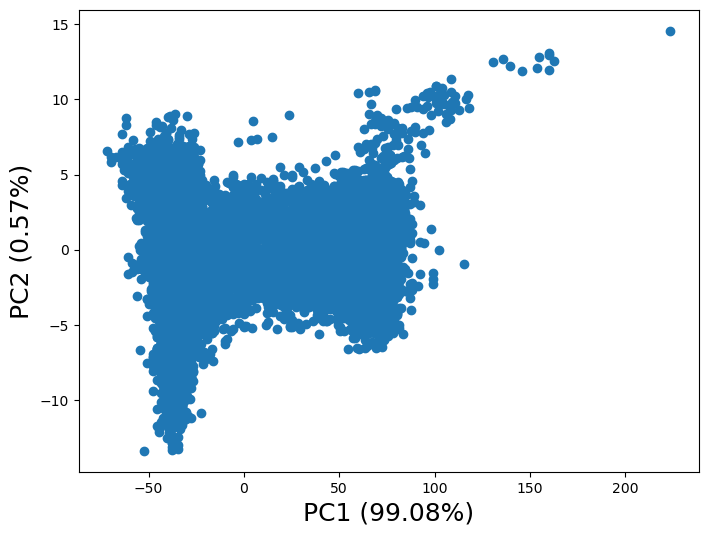

In [7]:
plt.figure(figsize=(8, 6))
plt.xlabel(f'PC1 ({var_exp[0]*100:.2f}%)', fontsize=18)
plt.ylabel(f'PC2 ({var_exp[1]*100:.2f}%)', fontsize=18)
plt.scatter(plotx[:,0], plotx[:,1])

## Choosing Number of Clusters

In [14]:
n = np.arange(1,11)
sse = []

for k in n:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(plotx)
    sse.append(kmeans.inertia_)

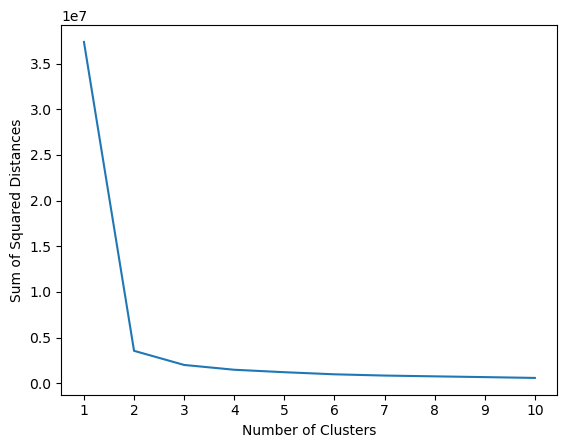

In [17]:
plt.plot(n, sse)
plt.xticks(n)
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.show()

## Plotting PCA + KMeans Cluster Centers

In [18]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(plotx)
centers = kmeans.cluster_centers_

centers

array([[ 5.94153166e+01,  2.02995662e-02,  2.72085548e-02,
        -2.99543238e-02,  2.52125292e-03],
       [-3.29586044e+01, -1.12604865e-02, -1.50930104e-02,
         1.66161314e-02, -1.39857839e-03]])

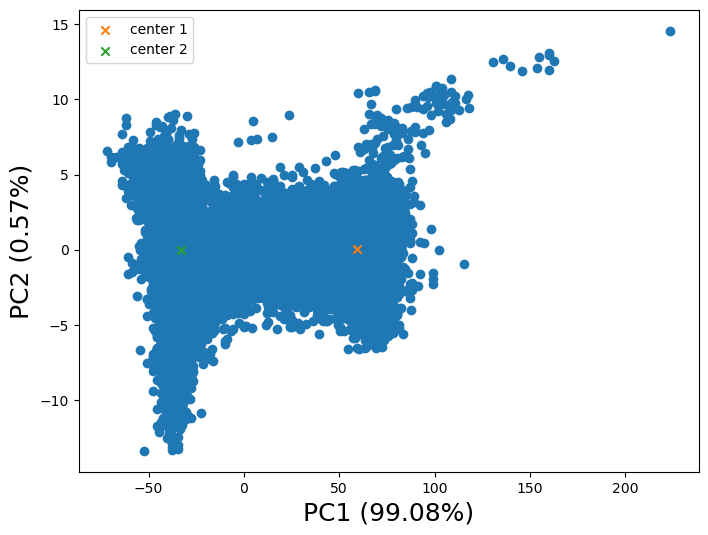

In [22]:
plt.figure(figsize=(8, 6))
plt.xlabel(f'PC1 ({var_exp[0]*100:.2f}%)', fontsize=18)
plt.ylabel(f'PC2 ({var_exp[1]*100:.2f}%)', fontsize=18)
plt.scatter(plotx[:,0], plotx[:,1])
plt.scatter(centers[0,0], centers[0,1], marker='x', label='center 1')
plt.scatter(centers[1,0], centers[1,1], marker='x', label='center 2')
plt.legend()